/home/gonken2020/anaconda3/envs/gen/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ 使用語彙数: 43219
✅ 総語彙数: 50000
✅ 未使用語彙数: 6781
✅ 使用率: 86.44%


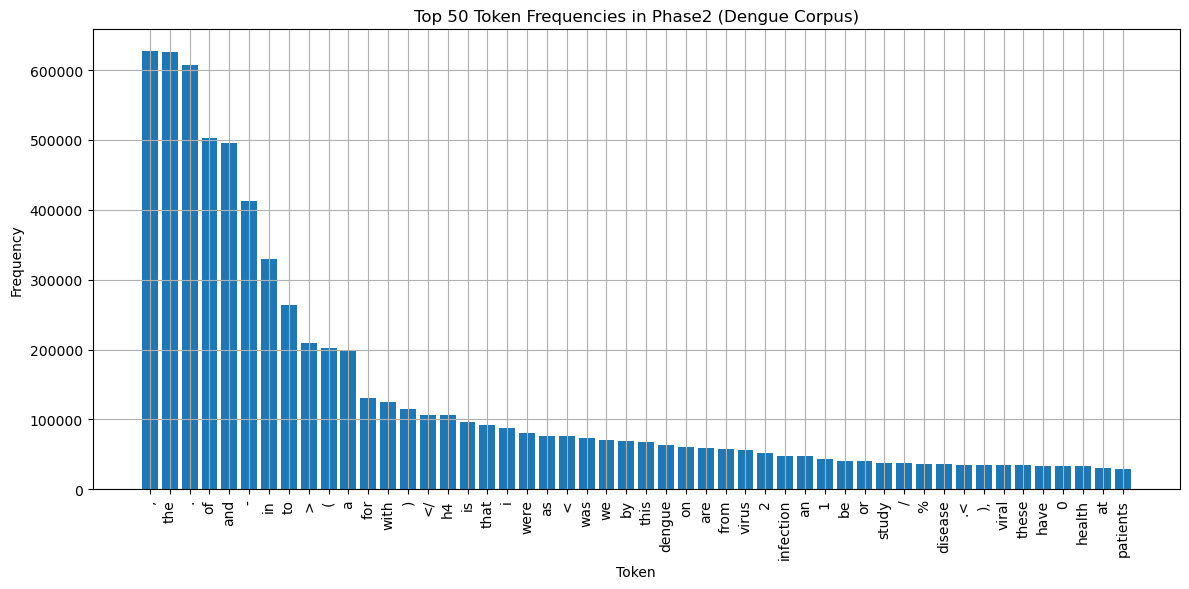

In [1]:
from collections import Counter
import pandas as pd
from transformers import PreTrainedTokenizerFast
import matplotlib.pyplot as plt

# トークナイザー読み込み
tokenizer = PreTrainedTokenizerFast(tokenizer_file="../tokenizer/tokenizer.json")  # あなたの再学習トークナイザー

# データ読み込み
df = pd.read_csv("../dengue_data/dengue_sentences.csv")
sentences = df["sentence"].dropna().astype(str).tolist()

# トークン出現回数をカウント
token_counter = Counter()
for sent in sentences:
    tokens = tokenizer.encode(sent, add_special_tokens=False)
    token_counter.update(tokens)

# 使用された語彙数と使用率
used_token_ids = set(token_counter.keys())
used_vocab_size = len(used_token_ids)
total_vocab_size = tokenizer.vocab_size
unused_vocab_size = total_vocab_size - used_vocab_size
used_ratio = used_vocab_size / total_vocab_size

print("✅ 使用語彙数:", used_vocab_size)
print("✅ 総語彙数:", total_vocab_size)
print("✅ 未使用語彙数:", unused_vocab_size)
print(f"✅ 使用率: {used_ratio:.2%}")

# 上位50語の可視化
top_tokens = token_counter.most_common(50)
top_token_ids, top_freqs = zip(*top_tokens)
top_token_strs = tokenizer.convert_ids_to_tokens(top_token_ids)

plt.figure(figsize=(12, 6))
plt.bar(top_token_strs, top_freqs)
plt.xticks(rotation=90)
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.title("Top 50 Token Frequencies in Phase2 (Dengue Corpus)")
plt.tight_layout()
plt.grid(True)
plt.show()
